In [22]:
pip install pytrends


Note: you may need to restart the kernel to use updated packages.


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from  pytrends.request import TrendReq

In [115]:
pytrends = TrendReq(hl = 'en-US', tz=360)
keyword= "cloud computing"



In [130]:
#Data Request
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m' , geo='',gprop='')


In [134]:
region_data= pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

C:\Users\khand\AppData\Local\Temp\ipykernel_20704\3853327368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword],y=region_data.index, palette="Blues_d")


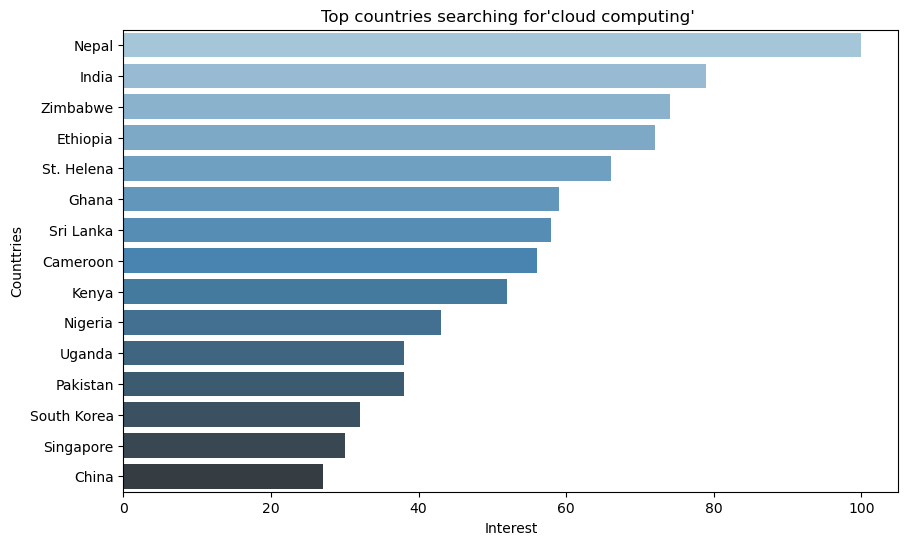

In [140]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index, palette="Blues_d")
plt.title(f"Top countries searching for'{keyword}' ")
plt.ylabel("Countries")
plt.xlabel("Interest")
plt.show()

In [161]:
#world map

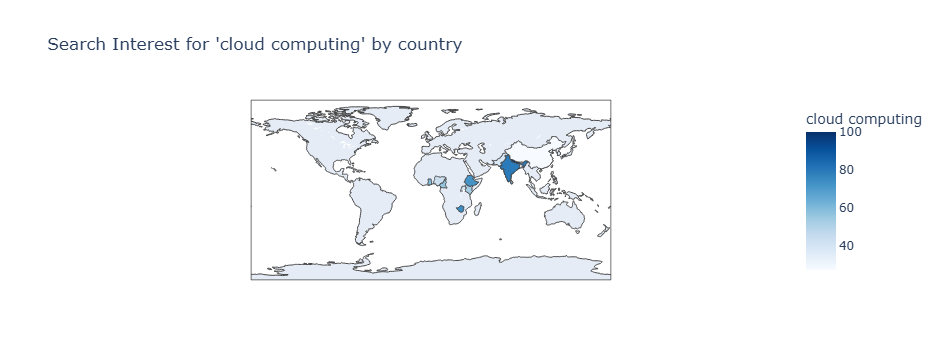

In [170]:
region_data= region_data.reset_index()
fig = px.choropleth(region_data,
                  locations='geoName',
                  locationmode = 'country names',
                  color= keyword,
                  title= f"Search Interest for '{keyword}' by country",
                color_continuous_scale='Blues')
fig.show()                

In [172]:
time_df = pytrends.interest_over_time()

C:\Users\khand\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



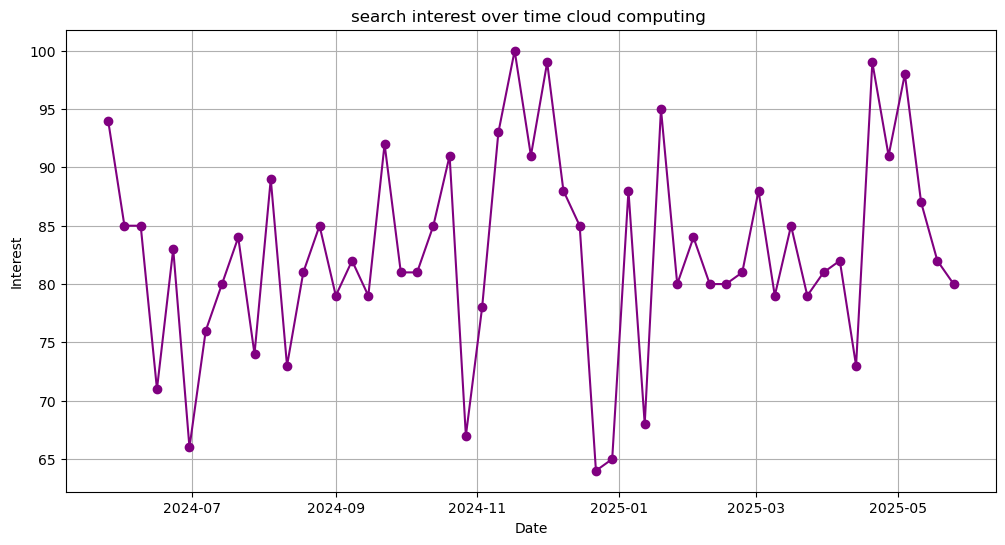

In [178]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker ='o',color='purple')
plt.title(f"search interest over time {keyword} ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

In [182]:
# multiple keyword

C:\Users\khand\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



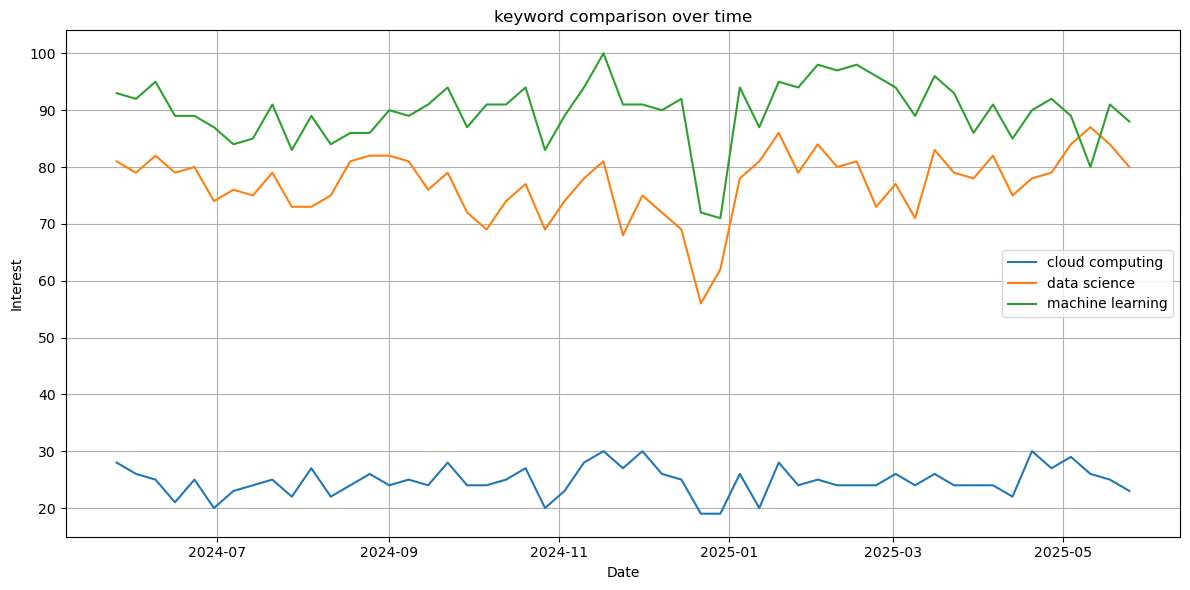

In [192]:
kw_list = ["cloud computing", "data science","machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m' , geo='',gprop='')

compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list: 
   plt.plot(compare_df.index,compare_df[kw],label=kw)


plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()